In [1]:
%matplotlib inline
import glob
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs

# Visualización

## ONI

In [16]:
# %load src/oni_plot.py

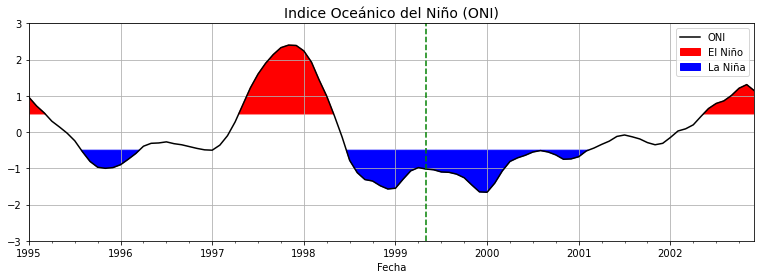

In [3]:
oni = pd.read_csv("./data/oni.txt")
#fig, ax = plt.subplots(figsize=(13,4))
plot_oni(oni, min_max = [1995, 2002], vline="1999-5")

## TRMM anomalía mensual

In [4]:
ds = xr.open_dataset("./data/processed/peru_anomaly.nc")
ds

<xarray.Dataset>
Dimensions:        (nlat: 85, nlon: 63, time: 242)
Coordinates:
  * nlon           (nlon) float32 -82.375 -82.125 -81.875 ... -67.125 -66.875
  * nlat           (nlat) float32 -20.125 -19.875 -19.625 ... 0.375 0.625 0.875
  * time           (time) datetime64[ns] 1998-01-31 1998-02-28 ... 2018-02-28
    month          (time) int64 ...
Data variables:
    precipitation  (time, nlat, nlon) float32 ...

In [5]:
# %load src/plot_map.py

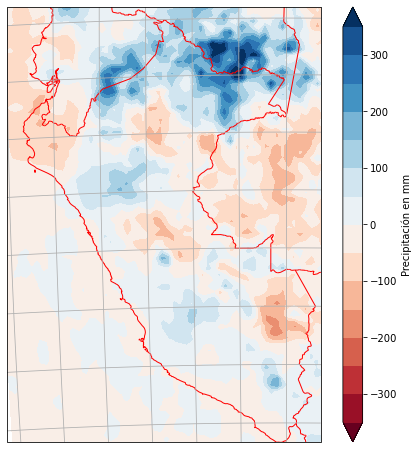

In [6]:
fig = plt.figure(figsize=(8,8))
_ = plot_map(ds.sel(time=ds.time[110]))

## Anotación

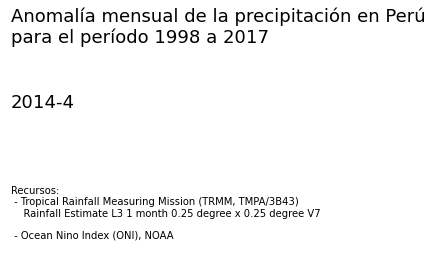

In [7]:
fig, ax = plt.subplots()
    
ax.axis("off")
ax.annotate(xy=(0.01,0.95) ,s="Anomalía mensual de la precipitación en Perú\npara el período 1998 a 2017", size=18)
ax.annotate(xy=(0.01,0.65) ,s="2014-4", size=18)
ax.annotate(xy=(0.01,0.15) ,s="Recursos:\n - Tropical Rainfall Measuring Mission (TRMM, TMPA/3B43)\n    Rainfall Estimate L3 1 month 0.25 degree x 0.25 degree V7", size=10)
ax.annotate(xy=(0.01,0.05) ,s=" - Ocean Nino Index (ONI), NOAA", size=10);

### Refactorización

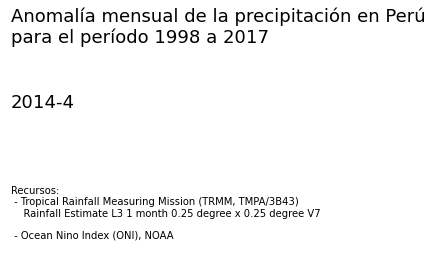

In [8]:
# %load src/annotation.py

## Trazado

[Matplotlib GridSpec](https://matplotlib.org/users/gridspec.html)

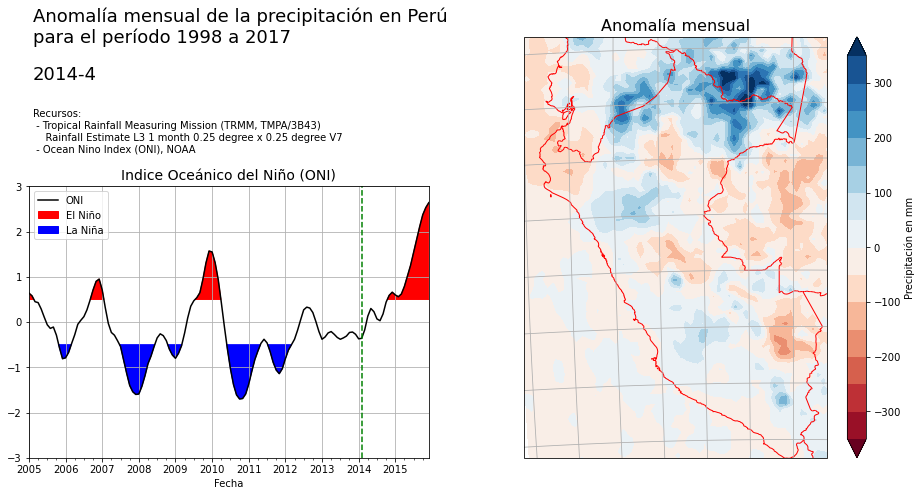

In [9]:
import matplotlib.gridspec as gridspec
#plt.figure(figsize=(13, 7))
#G = gridspec.GridSpec(3, 4)
#ax0 = plt.subplot(G[0, :-2])
#ax1 = plt.subplot(G[1:3, :-2])
#ax2 = plt.subplot(G[:3, 2:],projection=ccrs.Orthographic(-70,-15))
#plot_oni(oni, min_max = [2005, 2015], vline="2014-2", ax=ax1)
#plot_map(ds.sel(time=ds.time[110]), ax=ax2, title="Anomalía mensual")
#annotation(ax=ax0)
#plt.tight_layout()

### Refactorización

In [10]:
# %load src/final_plot.py

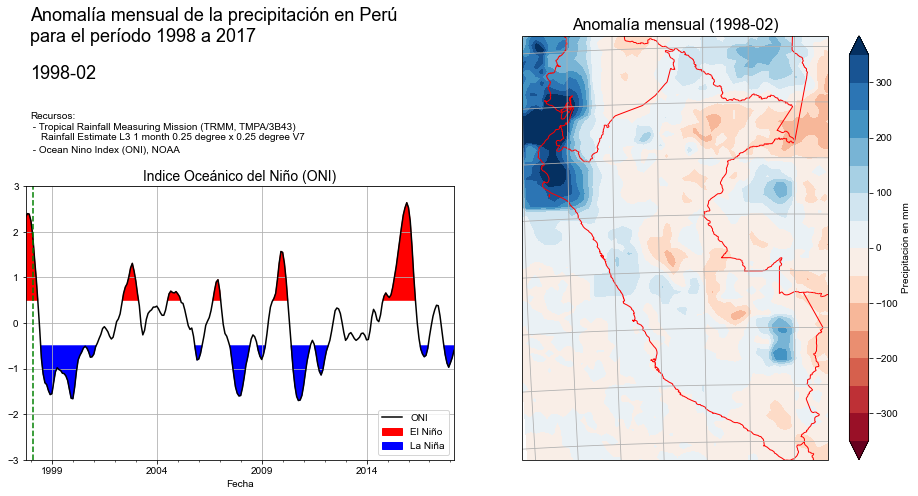

In [11]:
final_plot(ds=ds.sel(time=ds.time[1]))

### Almacenar los datos en el disco

In [14]:
def save_figures(ds, dpi=150):
    print("Processing ...\n")
    for e, _ in enumerate(ds.time):    
        if e%25==0:
            print("{} out from {} ...".format(e, len(ds.time)))
        final_plot(ds=ds.sel(time=ds.time[e]))
        date_title = pd.to_datetime(ds.time[e].values).strftime("%Y-%m") 
        plt.savefig("{}.png".format(date_title), bbox_inches="tight", dpi=dpi)
        plt.close()
    print("Done!")

In [15]:
save = True
if save:
    save_figures(ds, dpi=75)

Processing ...

0 out from 242 ...
25 out from 242 ...
50 out from 242 ...
75 out from 242 ...
100 out from 242 ...
125 out from 242 ...
150 out from 242 ...
175 out from 242 ...
200 out from 242 ...
225 out from 242 ...
Done!


### Cargar datos del disco y hacer una animación

In [19]:
import imageio

file_list = sorted(glob.glob("./*.png"))
file_list[:10]

['.\\1998-01.png',
 '.\\1998-02.png',
 '.\\1998-03.png',
 '.\\1998-04.png',
 '.\\1998-05.png',
 '.\\1998-06.png',
 '.\\1998-07.png',
 '.\\1998-08.png',
 '.\\1998-09.png',
 '.\\1998-10.png']

In [22]:
import imageio
file_list = sorted(glob.glob("./*.png"))

with imageio.get_writer('./animación/monthly.gif', mode='I', duration=0.5) as writer:
    print("Processing ...\n")
    for e, filename in enumerate(file_list):
        if e%25==0:
            print("{} out from {} ...".format(e, len(ds.time)))
        image = imageio.imread(filename)
        writer.append_data(image)
    print("Done!")

Processing ...

0 out from 242 ...
25 out from 242 ...
50 out from 242 ...
75 out from 242 ...
100 out from 242 ...
125 out from 242 ...
150 out from 242 ...
175 out from 242 ...
200 out from 242 ...
225 out from 242 ...
Done!
